# Flu Shot Learning: Predict H1N1 Flu Vaccine

## Problem description
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting probability for h1n1_vaccine<br>

**Target Variable:** h1n1_vaccine - Whether respondent received H1N1 flu vaccine.

## The features in this dataset
You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

| Variable | Description |
|:--|:--|
| h1n1_concern | Level of concern about the H1N1 flu.<br>(0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.) |
| h1n1_knowledge | Level of knowledge about H1N1 flu.<br>(0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.) |
| behavioral_antiviral_meds | Has taken antiviral medications. (binary) |
| behavioral_avoidance | Has avoided close contact with others with flu-like symptoms. (binary) |
|behavioral_face_mask | Has bought a face mask. (binary) |
|behavioral_wash_hands | Has frequently washed hands or used hand sanitizer. (binary)|
|behavioral_large_gatherings | Has reduced time at large gatherings. (binary)|
|behavioral_outside_home | Has reduced contact with people outside of own household. (binary)|
|behavioral_touch_face | Has avoided touching eyes, nose, or mouth. (binary)|
|doctor_recc_h1n1 | H1N1 flu vaccine was recommended by doctor. (binary)|
|doctor_recc_seasonal | Seasonal flu vaccine was recommended by doctor. (binary)|
|chronic_med_condition | Has any of the following chronic medical conditions:<br> asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)|
|child_under_6_months | Has regular close contact with a child under the age of six months. (binary)|
|health_worker | Is a healthcare worker. (binary)|
|health_insurance | Has health insurance. (binary)|
|opinion_h1n1_vacc_effective | Respondent's opinion about H1N1 vaccine effectiveness.<br>(1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.)|
|opinion_h1n1_risk | Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.<br>(1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.)|
|opinion_h1n1_sick_from_vacc | Respondent's worry of getting sick from taking H1N1 vaccine.<br>(1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.)|
|opinion_seas_vacc_effective | Respondent's opinion about seasonal flu vaccine effectiveness.<br>(1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.)|
|opinion_seas_risk | Respondent's opinion about risk of getting sick with seasonal flu without vaccine.<br>(1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.)|
|opinion_seas_sick_from_vacc | Respondent's worry of getting sick from taking seasonal flu vaccine.<br>(1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.)|
|age_group | Age group of respondent.|
|education | Self|reported education level.|
|race | Race of respondent.|
|sex | Sex of respondent.|
|income_poverty | Household annual income of respondent with respect to 2008 Census poverty thresholds.|
|marital_status | Marital status of respondent.|
|rent_or_own | Housing situation of respondent.|
|employment_status | Employment status of respondent.|
|hhs_geo_region | Respondent's residence using a 10|region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.|
|census_msa | Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.|
|household_adults | Number of other adults in household, top|coded to 3.|
|household_children | Number of children in household, top|coded to 3.|
|employment_industry | Type of industry respondent is employed in. Values are represented as short random character strings.|
|employment_occupation | Type of occupation of respondent. Values are represented as short random character strings.|

## Performance metric
Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. The mean of these two scores will be the overall score. A higher value indicates stronger performance.

In [1]:
import io
import os
import pandas as pd # Files I/O
import numpy as np # linear algebra

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
%cd "D:\flu dataset hackathon"

D:\flu dataset hackathon


In [129]:
vaccinetrain=pd.read_csv('training_set_features.csv') # Importing train file

In [130]:
vaccinetest=pd.read_csv('test_set_features.csv') # Importing test file

In [131]:
vaccinelabels=pd.read_csv('training_set_labels.csv') # Importing Labels file
# 2 dependent variables seasonal_vaccine and h1n1_vaccine
# seasonal_vaccine is Balanced data
# h1n1_vaccine is Imbalanced data

In [132]:
vaccinetrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [133]:
vaccinetrain.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [134]:
vaccinetrain.shape

(26707, 36)

In [135]:
vaccinetrain.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [136]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [137]:
vaccinetest.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [138]:
vaccinetest.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26707,53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,xtkaffoo


In [139]:
vaccinetest.shape

(26708, 36)

In [140]:
vaccinetest.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [141]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

### Checking the Null values in train file

In [142]:
vaccinetrain.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

### Checking null values in test file

In [143]:
vaccinetest.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

### concatinate both train and test dataframes which are named vaccinetrain and vaccinetest

In [144]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [145]:
combinedf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [146]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_months 

In [147]:
#checking null values after combining the 2 dataframes
combinedf.isnull().sum()

respondent_id                      0
h1n1_concern                     177
h1n1_knowledge                   238
behavioral_antiviral_meds        150
behavioral_avoidance             421
behavioral_face_mask              38
behavioral_wash_hands             82
behavioral_large_gatherings      159
behavioral_outside_home          164
behavioral_touch_face            256
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
health_insurance               24502
opinion_h1n1_vacc_effective      789
opinion_h1n1_risk                768
opinion_h1n1_sick_from_vacc      770
opinion_seas_vacc_effective      914
opinion_seas_risk               1013
opinion_seas_sick_from_vacc     1058
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

In [148]:
# we need to drop the 'respondent_id' because it doesn't impact while prediction
combinedf=combinedf.drop('respondent_id',axis=1)

In [149]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


## Using MICE Imputation for filling Null values

In [150]:
# After doing the MICE imputation, i saved that file in csv format and that files is used for EDA, Preprocessing, and 
# creating model
combinedf_impute=pd.read_csv('vaccine.csv')

In [151]:
#split data back to train and test dataframes with the help of loc function
vaccinetrain_df=combinedf_impute.loc[0:26706]
vaccinetest_df=combinedf_impute.loc[26707:53414]

In [152]:
# checking the data frames whether they split in the right way or not
print(vaccinetrain_df.shape)
print(vaccinetest_df.shape)

(26707, 35)
(26708, 35)


In [153]:
vaccinetrain_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,17,10
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,21,18
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [154]:
vaccinetrain_df.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,2,0,0,1,0,0,0,1,0,0,...,0,1,0,1,9,2,0,0,18,22
26703,1,2,0,1,0,1,0,0,0,1,...,0,1,1,0,6,1,1,0,4,2
26704,2,2,0,1,1,1,1,0,1,0,...,0,1,0,0,6,0,0,0,19,16
26705,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,5,2,1,0,4,6
26706,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,7,1,1,0,2,17


In [155]:
vaccinetrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   h1n1_concern                 26707 non-null  int64
 1   h1n1_knowledge               26707 non-null  int64
 2   behavioral_antiviral_meds    26707 non-null  int64
 3   behavioral_avoidance         26707 non-null  int64
 4   behavioral_face_mask         26707 non-null  int64
 5   behavioral_wash_hands        26707 non-null  int64
 6   behavioral_large_gatherings  26707 non-null  int64
 7   behavioral_outside_home      26707 non-null  int64
 8   behavioral_touch_face        26707 non-null  int64
 9   doctor_recc_h1n1             26707 non-null  int64
 10  doctor_recc_seasonal         26707 non-null  int64
 11  chronic_med_condition        26707 non-null  int64
 12  child_under_6_months         26707 non-null  int64
 13  health_worker                26707 non-null  i

In [156]:
vaccinetrain_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.617853,1.262216,0.048976,0.724904,0.069046,0.825551,0.358932,0.337589,0.677163,0.221141,...,0.555922,0.465271,0.245142,0.522784,4.829745,0.833489,0.888868,0.538136,10.598457,12.935897
std,0.910958,0.618637,0.215822,0.446571,0.253536,0.379502,0.479696,0.472897,0.467570,0.415023,...,0.712126,0.498802,0.430179,0.607157,2.805984,0.823313,0.754927,0.929837,7.051304,7.050396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,7.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,11.000000,13.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,7.000000,2.000000,1.000000,1.000000,18.000000,20.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,9.000000,2.000000,3.000000,3.000000,21.000000,23.000000


# EDA - Exploratory Data Analysis

<Axes: ylabel='count'>

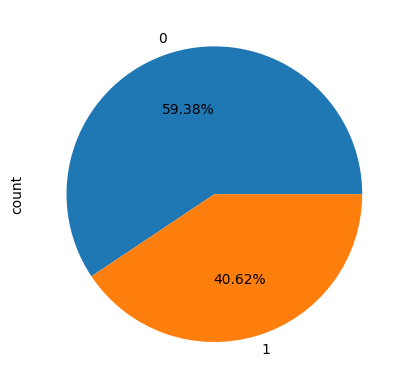

In [157]:
# Pie Diagram - sex
vaccinetrain_df.sex.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

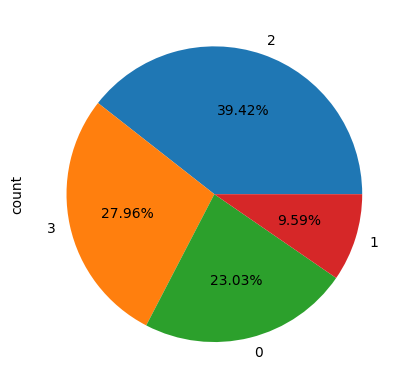

In [158]:
# Pie Diagram - education
vaccinetrain_df.education.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

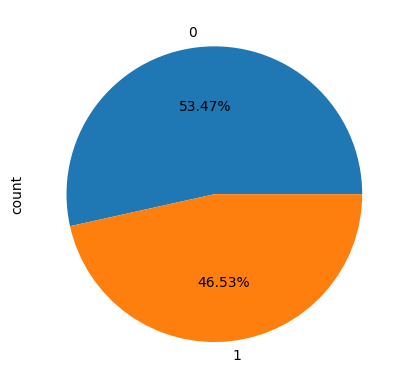

In [159]:
# Pie Diagram - marital_status
vaccinetrain_df.marital_status.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

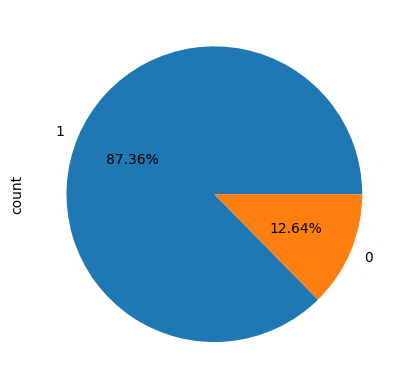

In [160]:
# Pie Diagram - health_insurance
vaccinetrain_df.health_insurance.value_counts().plot(kind='pie',autopct='%0.2f%%')

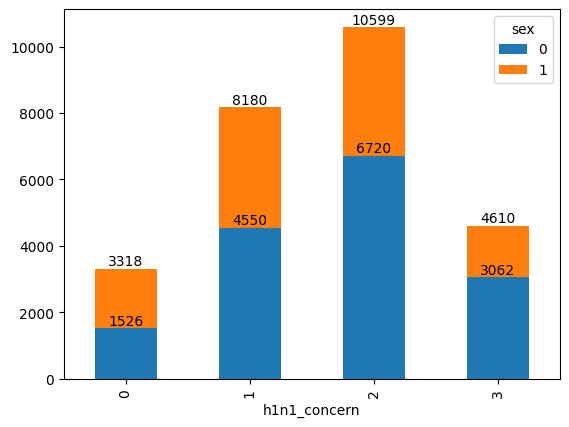

In [161]:
# Stacked Bar Plot - h1n1_concern & sex 
ax=pd.crosstab(vaccinetrain_df.h1n1_concern,vaccinetrain_df.sex).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i) 

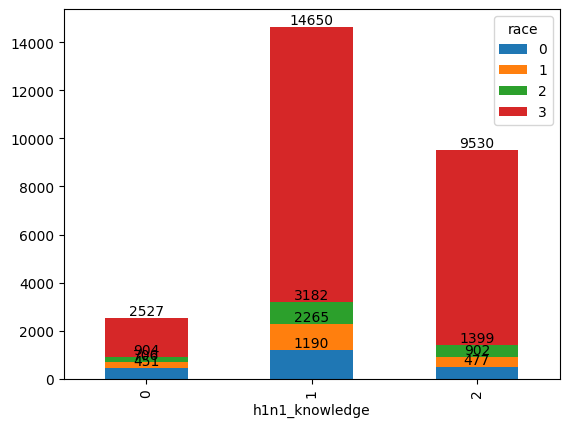

In [162]:
# Stacked Bar Plot - h1n1_knowledge & race
ax=pd.crosstab(vaccinetrain_df.h1n1_knowledge,vaccinetrain_df.race).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

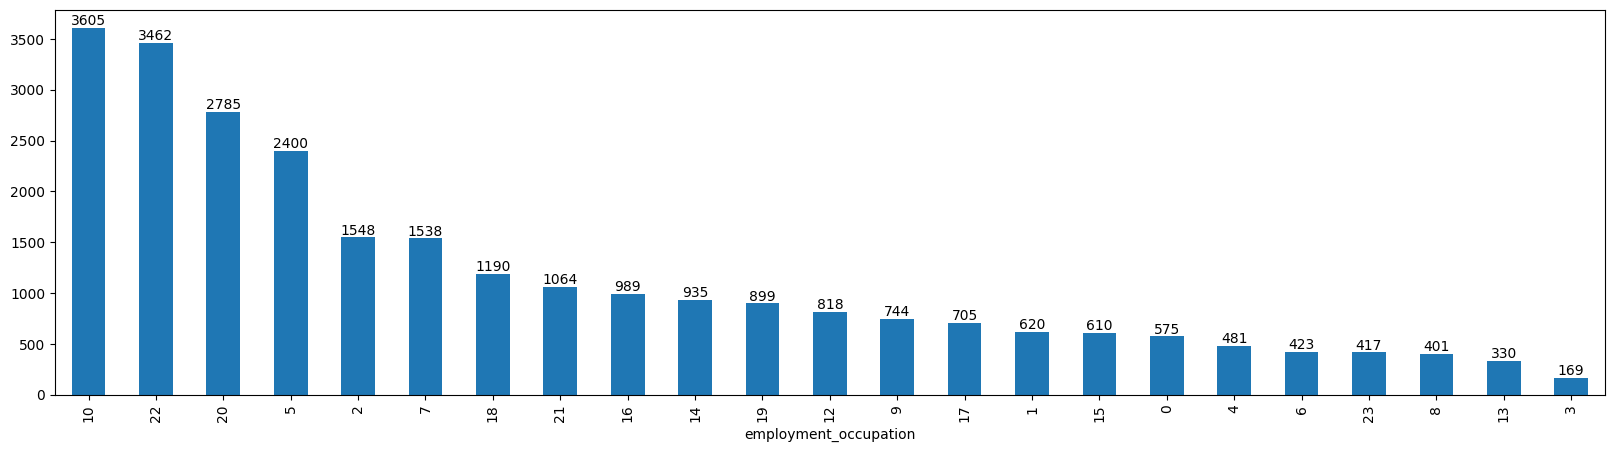

In [163]:
ax=vaccinetest_df.employment_occupation.value_counts(dropna=False).plot(kind='bar',figsize=(20,5))
for i in ax.containers:
    ax.bar_label(i)

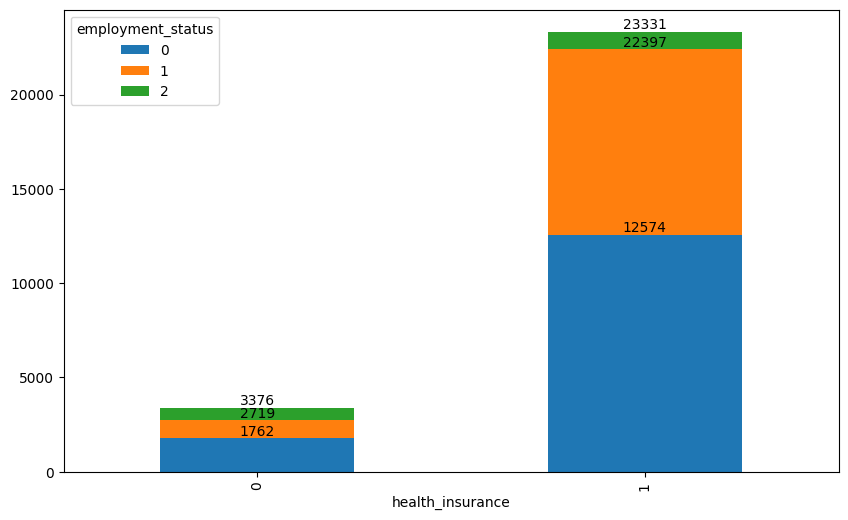

In [164]:
# Stacked Bar Plot of health_insurance & employment_status
ax=pd.crosstab(vaccinetrain_df.health_insurance,vaccinetrain_df.employment_status).plot(kind='bar',stacked=True,figsize=(10,6))
for i in ax.containers:
    ax.bar_label(i)

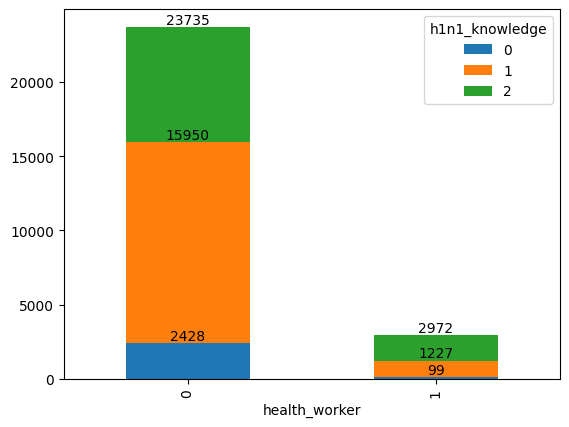

In [165]:
# Stacked Bar Plot of health_worker & h1n1knowledge
ax=pd.crosstab(vaccinetrain_df.health_worker,vaccinetrain_df.h1n1_knowledge).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing
### Test Null No Association between h1n1_vaccine & h1n1concern

In [166]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_concern)

h1n1_concern,0,1,2,3
h1n1_vaccine,,,,
0,2868,6776,8121,3268
1,450,1404,2478,1342


In [167]:
from scipy.stats import chi2_contingency

In [168]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_concern))
# since pvalue=6.630673040490488e-86 is less than 0.05, Reject Null Hypothesis
# Null:There is no Association between h1n1_vaccine and h1n1_concern

Chi2ContingencyResult(statistic=397.8006003611268, pvalue=6.630673040490488e-86, dof=3, expected_freq=array([[2613.0787434 , 6442.12902984, 8347.20361703, 3630.58860973],
       [ 704.9212566 , 1737.87097016, 2251.79638297,  979.41139027]]))

### Test Null No Association between h1n1_vaccine & h1n1knowledge

In [169]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_knowledge)

h1n1_knowledge,0,1,2
h1n1_vaccine,,,
0,2161,11987,6885
1,366,2663,2645


In [170]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_knowledge))
# since pvalue=5.10667650944343e-86 is less than 0.05, Reject Null Hypothesis
# Null:There is no Association between h1n1_vaccine and h1n1_knowledge

Chi2ContingencyResult(statistic=392.7835383888175, pvalue=5.10667650944343e-86, dof=2, expected_freq=array([[ 1990.12959149, 11537.55382484,  7505.31658367],
       [  536.87040851,  3112.44617516,  2024.68341633]]))

### Test Null No Association between h1n1_vaccine & health_worker

In [171]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.health_worker)

health_worker,0,1
h1n1_vaccine,,
0,19257,1776
1,4478,1196


In [172]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.health_worker))
# since pvalue=1.3303119747412174e-158 is less than 0.05, Reject Null Hypothesis
# Null:There is no Association between h1n1_vaccine and health_worker

Chi2ContingencyResult(statistic=720.0124430720413, pvalue=1.3303119747412174e-158, dof=1, expected_freq=array([[18692.41228891,  2340.58771109],
       [ 5042.58771109,   631.41228891]]))

### Test Null No Association between h1n1_vaccine & sex

In [173]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.sex)

sex,0,1
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [174]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.sex))
# since pvalue=pvalue=0.0007709155489949327 is less than 0.05, Reject Null Hypothesis
# Null: There is no Association between h1n1_vaccine and sex

Chi2ContingencyResult(statistic=11.309981152455997, pvalue=0.0007709155489949327, dof=1, expected_freq=array([[12488.90979893,  8544.09020107],
       [ 3369.09020107,  2304.90979893]]))

### Test Null No Association between h1n1_vaccine & employment_status

In [175]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.employment_status)

employment_status,0,1,2
h1n1_vaccine,,,
0,11281,8421,1331
1,3055,2359,260


In [176]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.employment_status))
# since pvalue=2.874594057701793e-06 is less than 0.05, Reject Null Hypothesis
# Null: There is no Association in between h1n1_vaccine and employement_status

Chi2ContingencyResult(statistic=25.51919818201071, pvalue=2.874594057701793e-06, dof=2, expected_freq=array([[11290.26427528,  8489.74950388,  1252.98622084],
       [ 3045.73572472,  2290.25049612,   338.01377916]]))

### Test Null No Association between h1n1_vaccine & education

In [177]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.education)

education,0,1,2,3
h1n1_vaccine,,,,
0,5018,2135,7962,5918
1,1133,426,2566,1549


In [178]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.education))
# since pvalue=7.99132008742846e-27 is less than 0.05, Reject Null Hypothesis
# Null: There is no Association in between h1n1_vaccine and education

Chi2ContingencyResult(statistic=124.57205062910732, pvalue=7.99132008742846e-27, dof=3, expected_freq=array([[4844.19751376, 2016.90616692, 8291.28782716, 5880.60849216],
       [1306.80248624,  544.09383308, 2236.71217284, 1586.39150784]]))

## Splitting into Dependent variable(y) and independent variable(X's)

In [179]:
y=vaccinelabels.h1n1_vaccine
X=vaccinetrain_df

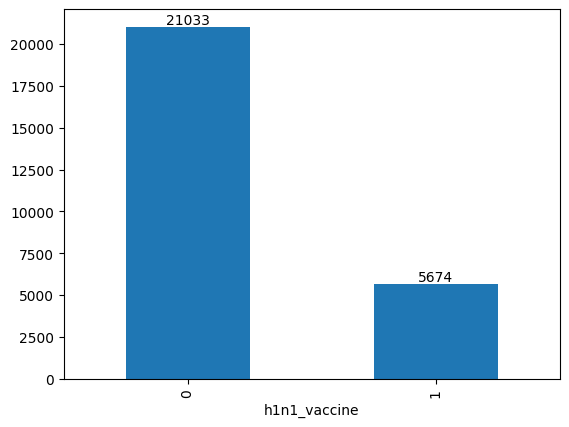

In [180]:
ax=y.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
# imbalance in classes 
# levels-0- majority class(21033) & 1-minority classes(5674)

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
y=LabelEncoder().fit_transform(y)

<Figure size 1500x3000 with 0 Axes>

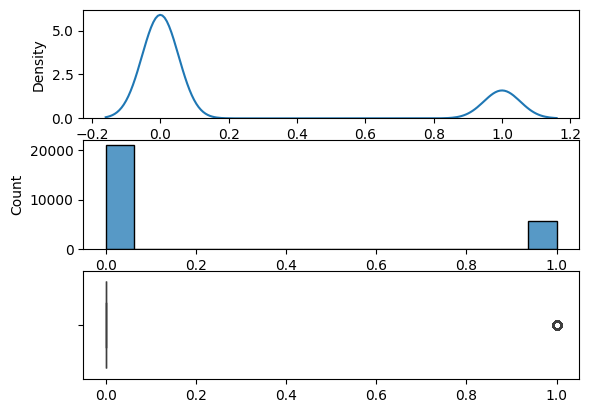

In [183]:
plt.figure(figsize=(15,30))
fig, ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.histplot(y,ax=ax[1])
sns.boxplot(y,orient='h',ax=ax[2])
plt.show()

# Model Building
## Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
logit=LogisticRegression(max_iter=300)

In [186]:
logitmodel=logit.fit(X,y)

In [187]:
logitmodel.score(X,y) # Accuracy

0.8305313213764182

In [188]:
logitpredict=logitmodel.predict(X)

In [189]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,19915,1118
1,3408,2266


In [190]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [191]:
print(classification_report(y,logitpredict))
# Minority class(1) predictions scores are worst.

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.81      0.83      0.81     26707



In [192]:
cross_val_score(logit,X,y)

array([0.8257207 , 0.82441033, 0.83467515, 0.83523685, 0.82943269])

In [193]:
np.mean([0.8257207 , 0.82422314, 0.83486239, 0.83542408, 0.82943269])

0.8299326

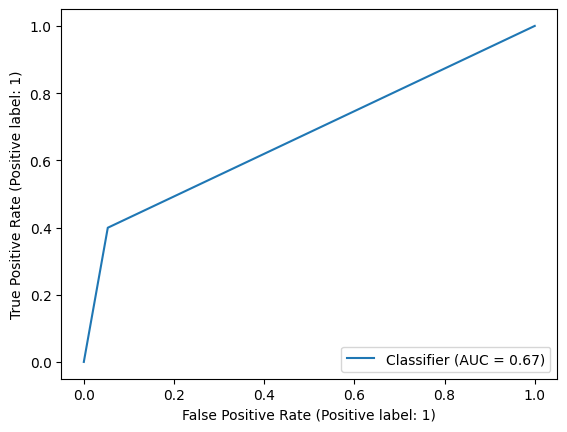

In [194]:
RocCurveDisplay.from_predictions(y,logitpredict)

# To treat with imbalance data we need to install imblearn

!pip install imblearn

In [195]:
from imblearn.over_sampling import SMOTEN

In [196]:
smote=SMOTEN(random_state=42)

In [197]:
X_smote,y_smote=smote.fit_resample(X,y)

In [198]:
# Here we can see the difference between smote and without smote
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

0    21033
1     5674
Name: count, dtype: int64
0    21033
1    21033
Name: count, dtype: int64


# Logistic Regression with Smoten

In [199]:
logit_smote_model=logit.fit(X_smote,y_smote)

In [200]:
logit_smote_model.score(X_smote,y_smote)

0.8109874958398707

In [201]:
logit_smote_predict=logit_smote_model.predict(X_smote)

In [202]:
print(classification_report(y_smote,logit_smote_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



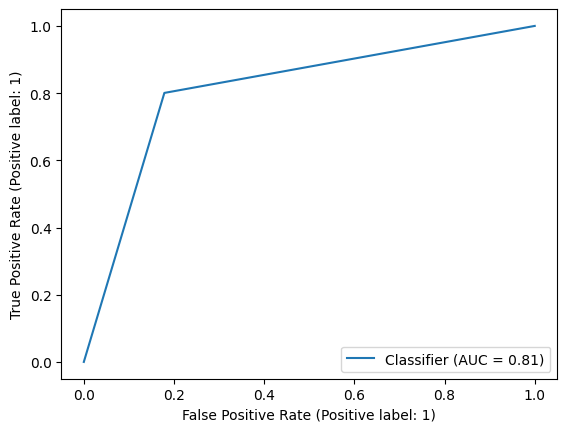

In [203]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_predict)

In [204]:
test_logit=logit_smote_model.predict_proba(vaccinetest_df)

In [205]:
pd.DataFrame(test_logit).to_csv('log_h1n1.csv')

# Decission Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
tree=DecisionTreeClassifier(max_depth=12)

In [208]:
treemodel=tree.fit(X,y)

In [209]:
treemodel.score(X,y)

0.899127569551054

In [210]:
cross_val_score(tree,X,y)

array([0.79183826, 0.78678398, 0.80434376, 0.80116083, 0.79198652])

In [211]:
np.mean([0.79333583, 0.78453763, 0.80284591, 0.79966298, 0.7912376 ])

0.79432399

In [212]:
treepredict=treemodel.predict(X)

In [213]:
pd.crosstab(y,treepredict)

col_0,0,1
row_0,,
0,20348,685
1,2009,3665


In [214]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     21033
           1       0.84      0.65      0.73      5674

    accuracy                           0.90     26707
   macro avg       0.88      0.81      0.83     26707
weighted avg       0.90      0.90      0.89     26707



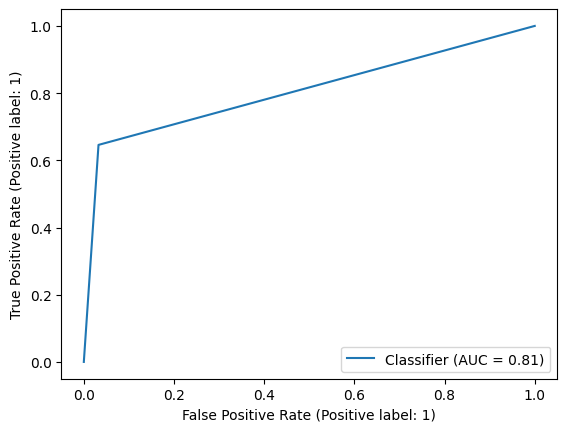

In [215]:
RocCurveDisplay.from_predictions(y,treepredict)

# Decision Tree with smoten

In [216]:
tree_sm=DecisionTreeClassifier(max_depth=8)

In [217]:
tree_smote_model=tree_sm.fit(X_smote,y_smote)

In [218]:
tree_smote_model.score(X_smote,y_smote)

0.8120334712119051

In [219]:
cross_val_score(tree_sm,X_smote,y_smote)

array([0.64975042, 0.78568881, 0.82491382, 0.83573042, 0.82348746])

In [220]:
np.mean([0.64915617, 0.78545109, 0.8246761 , 0.83549269, 0.82324973])

0.783605156

In [221]:
tree_smote_predict=tree_smote_model.predict(X_smote)

In [222]:
pd.crosstab(y_smote,tree_smote_predict)

col_0,0,1
row_0,,
0,17413,3620
1,4287,16746


In [223]:
print(classification_report(y_smote,tree_smote_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



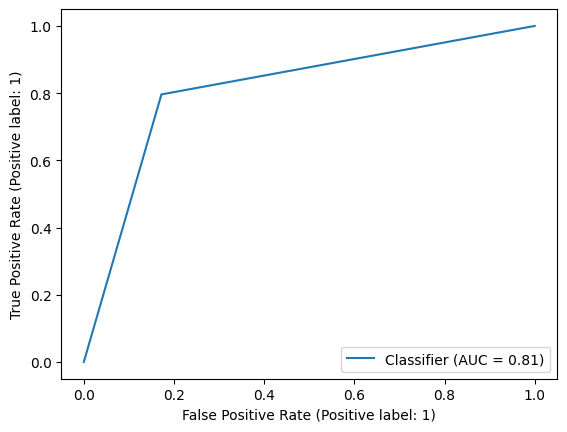

In [224]:
RocCurveDisplay.from_predictions(y_smote,tree_smote_predict)

In [225]:
test_tree_sm=tree_smote_model.predict_proba(vaccinetest_df)

In [226]:
pd.DataFrame(test_tree_sm).to_csv('tree_sm_h1n1.csv')

# Random Forest

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
RF=RandomForestClassifier(n_estimators=1200,max_depth=8)

In [229]:
RFmodel=RF.fit(X,y)

In [230]:
RFmodel.score(X,y)

0.8427753023551878

In [231]:
cross_val_score(RF,X,y)

array([0.8260951 , 0.82422314, 0.83093054, 0.83036884, 0.82606254])

In [232]:
np.mean([0.82459753, 0.82534631, 0.83093054, 0.82961992, 0.82550084])

0.8271990280000001

In [233]:
RFpredict=RFmodel.predict(X)

In [234]:
pd.crosstab(y,RFpredict)

col_0,0,1
row_0,,
0,20483,550
1,3649,2025


In [235]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     21033
           1       0.79      0.36      0.49      5674

    accuracy                           0.84     26707
   macro avg       0.82      0.67      0.70     26707
weighted avg       0.84      0.84      0.82     26707



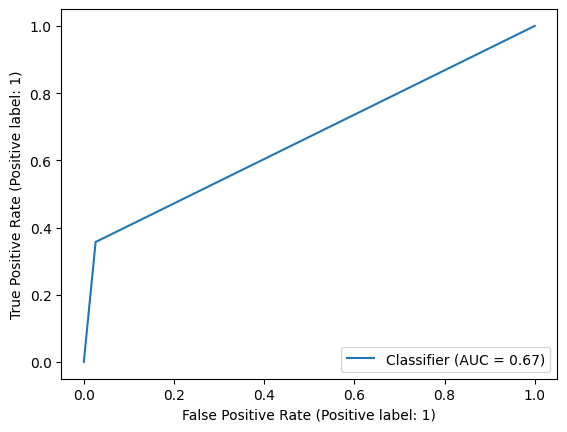

In [236]:
RocCurveDisplay.from_predictions(y,RFpredict)

# Random Forest with smoten

In [237]:
RF_smote=RandomForestClassifier(max_depth=6,n_estimators=1000)

In [238]:
RF_smote_model=RF_smote.fit(X_smote,y_smote)

In [239]:
RF_smote_model.score(X_smote,y_smote)

0.8107973184995008

In [240]:
cross_val_score(RF_smote,X_smote,y_smote)

array([0.70905633, 0.79258291, 0.81671223, 0.83299655, 0.8272911 ])

In [241]:
np.mean([0.70917518, 0.791632  , 0.81599905, 0.83299655, 0.82764769])

0.795490094

In [242]:
RF_smote_predict=RF_smote_model.predict(X_smote)

In [243]:
pd.crosstab(y_smote,RF_smote_predict)

col_0,0,1
row_0,,
0,17625,3408
1,4551,16482


In [244]:
print(classification_report(y_smote,RF_smote_predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82     21033
           1       0.83      0.78      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



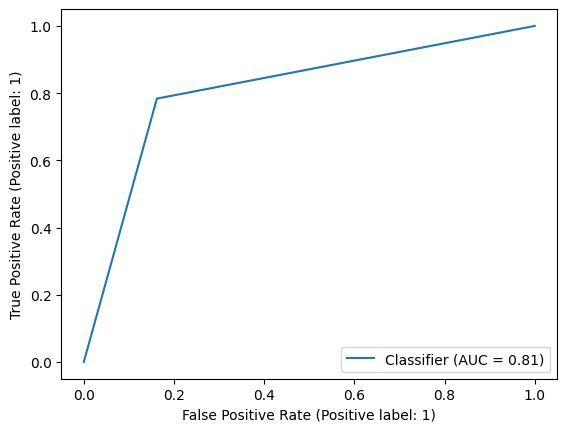

In [245]:
RocCurveDisplay.from_predictions(y_smote,RF_smote_predict)

In [246]:
test_RF=RF_smote_model.predict_proba(vaccinetest_df)

In [247]:
pd.DataFrame(test_RF).to_csv('RF_h1n1.csv')

# GBM (Gradient Boosting Machine)

In [248]:
from sklearn.ensemble import GradientBoostingClassifier

In [249]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [250]:
gbmmodel=gbm.fit(X,y)

In [251]:
gbmmodel.score(X,y)

0.8602987980679223

In [252]:
cross_val_score(gbm,X,y)

array([0.83302134, 0.82890303, 0.83336454, 0.8391687 , 0.82624977])

In [253]:
np.mean([0.83302134, 0.82890303, 0.83336454, 0.8391687 , 0.82624977])

0.832141476

In [254]:
gbmpredict=gbmmodel.predict(X)

In [255]:
pd.crosstab(y,gbmpredict)

col_0,0,1
row_0,,
0,20054,979
1,2752,2922


In [256]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     21033
           1       0.75      0.51      0.61      5674

    accuracy                           0.86     26707
   macro avg       0.81      0.73      0.76     26707
weighted avg       0.85      0.86      0.85     26707



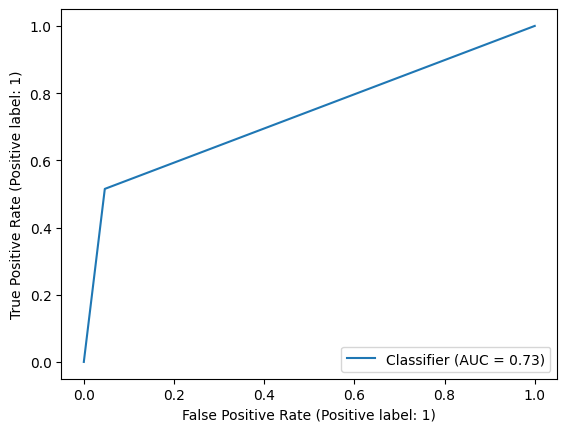

In [257]:
RocCurveDisplay.from_predictions(y,gbmpredict)

# GBM (Gradient Boosting Machine) with Smoten

In [258]:
gbm_s=GradientBoostingClassifier(max_depth=2,n_estimators=100)

In [259]:
gbm_smote_model=gbm_s.fit(X_smote,y_smote)

In [260]:
gbm_smote_model.score(X_smote,y_smote)

0.8187847667950364

In [261]:
cross_val_score(gbm_s,X_smote,y_smote)

array([0.69479439, 0.80149768, 0.83941519, 0.84844883, 0.84583383])

In [262]:
np.mean([0.69479439, 0.80149768, 0.83941519, 0.84844883, 0.84583383])

0.805997984

In [263]:
gbm_smote_predict=gbm_smote_model.predict(X_smote)

In [264]:
pd.crosstab(y_smote,gbm_smote_predict)

col_0,0,1
row_0,,
0,17459,3574
1,4049,16984


In [265]:
print(classification_report(y_smote,gbm_smote_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     21033
           1       0.83      0.81      0.82     21033

    accuracy                           0.82     42066
   macro avg       0.82      0.82      0.82     42066
weighted avg       0.82      0.82      0.82     42066



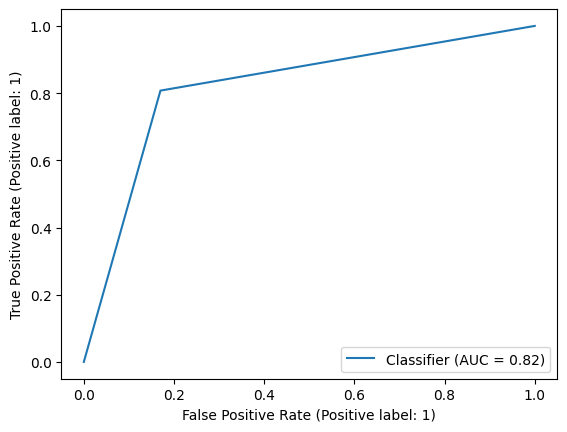

In [266]:
RocCurveDisplay.from_predictions(y_smote,gbm_smote_predict)

In [267]:
test_gbm=gbm_smote_model.predict_proba(vaccinetest_df)

In [268]:
pd.DataFrame(test_gbm).to_csv('gbm_h1n1.csv')

# SVM (Support Vector Machine)

In [269]:
from sklearn.svm import SVC

In [270]:
svc=SVC(C=3)

In [271]:
svcmodel=svc.fit(X,y)

In [272]:
svcmodel.score(X,y)

0.8315797356498297

In [273]:
cross_val_score(svc,X,y)

array([0.82852864, 0.8214152 , 0.82606254, 0.82493915, 0.82812207])

In [274]:
np.mean([0.82852864, 0.8214152 , 0.82606254, 0.82493915, 0.82812207])

0.8258135200000002

In [275]:
svcpredict=svc.predict(X)

In [276]:
pd.crosstab(y,svcpredict)

col_0,0,1
row_0,,
0,20359,674
1,3824,1850


In [277]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     21033
           1       0.73      0.33      0.45      5674

    accuracy                           0.83     26707
   macro avg       0.79      0.65      0.68     26707
weighted avg       0.82      0.83      0.81     26707



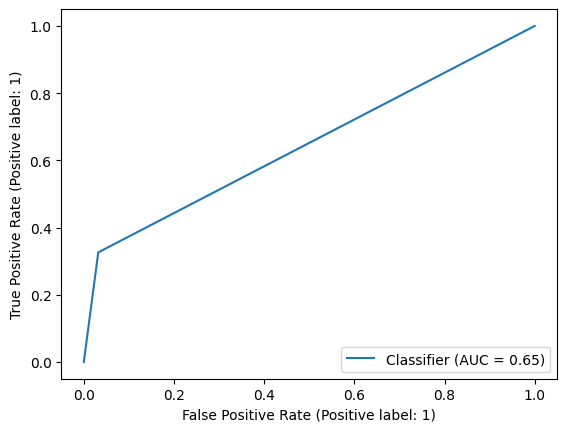

In [278]:
RocCurveDisplay.from_predictions(y,svcpredict)

# SVm (Support Vector Machine) with smoten

In [279]:
svc_sm=SVC(probability=True)

In [280]:
svcmodel_sm=svc_sm.fit(X_smote,y_smote)

In [281]:
svcmodel_sm.score(X_smote,y_smote)

0.8231588456235439

In [282]:
cross_val_score(svc_sm,X_smote,y_smote)

array([0.67518422, 0.80363723, 0.84844883, 0.85855224, 0.85094497])

In [283]:
np.mean([0.67518422, 0.80363723, 0.84844883, 0.85855224, 0.85094497])

0.807353498

In [284]:
svcpredict_X_sm=svc_sm.predict(X_smote)

In [285]:
pd.crosstab(y_smote,svcpredict_X_sm)

col_0,0,1
row_0,,
0,17678,3355
1,4084,16949


In [286]:
print(classification_report(y_smote,svcpredict_X_sm))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     21033
           1       0.83      0.81      0.82     21033

    accuracy                           0.82     42066
   macro avg       0.82      0.82      0.82     42066
weighted avg       0.82      0.82      0.82     42066



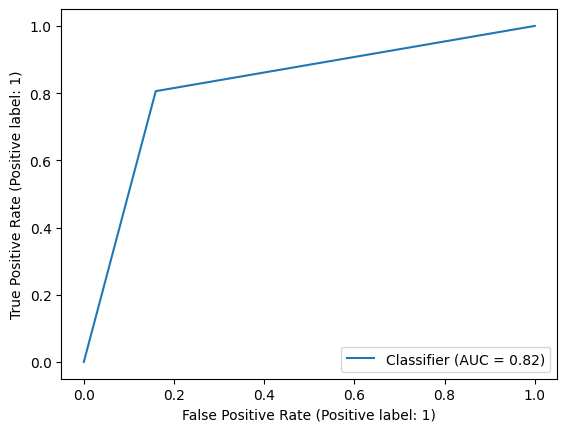

In [287]:
RocCurveDisplay.from_predictions(y_smote,svcpredict_X_sm)

In [288]:
test_svc=svc_sm.predict_proba(vaccinetest_df)

In [289]:
pd.DataFrame(test_svc).to_csv('svc_h1n1.csv')

# KNN (KNearestneighbors)

In [290]:
from sklearn.neighbors import KNeighborsClassifier

In [291]:
knc=KNeighborsClassifier()

In [292]:
kncmodel=knc.fit(X,y)

In [293]:
kncmodel.score(X,y)

0.8468940727150185

In [294]:
cross_val_score(knc,X,y)

array([0.79857731, 0.79239985, 0.79236098, 0.7931099 , 0.78805467])

In [295]:
np.mean([0.79857731, 0.79239985, 0.79236098, 0.7931099 , 0.78805467])

0.7929005420000002

In [296]:
kncpredict_X=knc.predict(X)

In [297]:
pd.crosstab(y,kncpredict_X)

col_0,0,1
row_0,,
0,20179,854
1,3235,2439


In [298]:
print(classification_report(y,kncpredict_X))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     21033
           1       0.74      0.43      0.54      5674

    accuracy                           0.85     26707
   macro avg       0.80      0.69      0.73     26707
weighted avg       0.84      0.85      0.83     26707



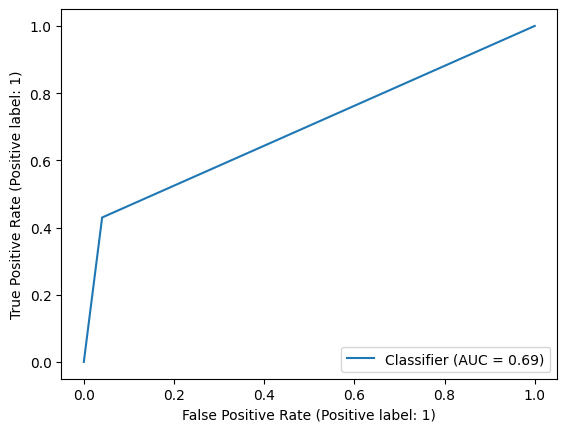

In [299]:
RocCurveDisplay.from_predictions(y,kncpredict_X)

# KNN(KNearestNeighbors) with smoten

In [300]:
knc_sm=KNeighborsClassifier()

In [301]:
kncmodel_sm=knc_sm.fit(X_smote,y_smote)

In [302]:
kncmodel_sm.score(X_smote,y_smote)

0.8512813198307422

In [303]:
cross_val_score(knc_sm,X_smote,y_smote)

array([0.66508201, 0.76987995, 0.82812314, 0.82966837, 0.82253655])

In [304]:
np.mean([0.66508201, 0.76987995, 0.82812314, 0.82966837, 0.82253655])

0.783058004

In [305]:
knc_predict_X_sm=knc_sm.predict(X_smote)

In [306]:
pd.crosstab(y_smote,knc_predict_X_sm)

col_0,0,1
row_0,,
0,16584,4449
1,1807,19226


In [307]:
print(classification_report(y_smote,knc_predict_X_sm))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84     21033
           1       0.81      0.91      0.86     21033

    accuracy                           0.85     42066
   macro avg       0.86      0.85      0.85     42066
weighted avg       0.86      0.85      0.85     42066



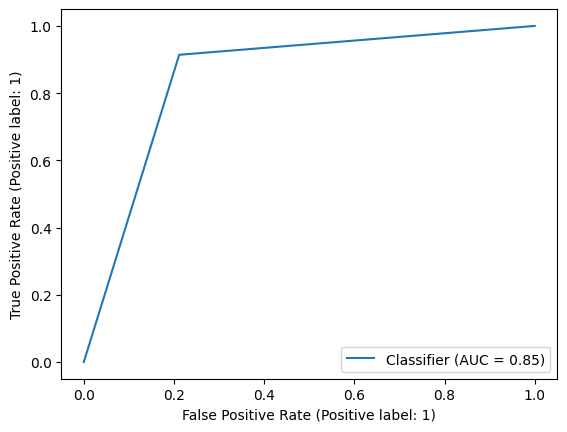

In [308]:
RocCurveDisplay.from_predictions(y_smote,knc_predict_X_sm)

In [309]:
test_knc=knc_sm.predict_proba(vaccinetest_df)

In [310]:
pd.DataFrame(test_knc).to_csv('knc_h1n1.csv')

# Naive_bayes(GaussianNB)

In [311]:
from sklearn.naive_bayes import GaussianNB

In [312]:
gnb=GaussianNB()

In [315]:
gnbmodel=gnb.fit(X,y)

In [316]:
gnbmodel.score(X,y)

0.7655670797918149

In [317]:
cross_val_score(knc,X,y)

array([0.79857731, 0.79239985, 0.79236098, 0.7931099 , 0.78805467])

In [318]:
np.mean([0.79857731, 0.79239985, 0.79236098, 0.7931099 , 0.78805467])

0.7929005420000002

In [319]:
gnbpredict_X=gnb.predict(X)

In [320]:
pd.crosstab(y,gnbpredict_X)

col_0,0,1
row_0,,
0,16944,4089
1,2172,3502


In [321]:
print(classification_report(y,gnbpredict_X))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84     21033
           1       0.46      0.62      0.53      5674

    accuracy                           0.77     26707
   macro avg       0.67      0.71      0.69     26707
weighted avg       0.80      0.77      0.78     26707



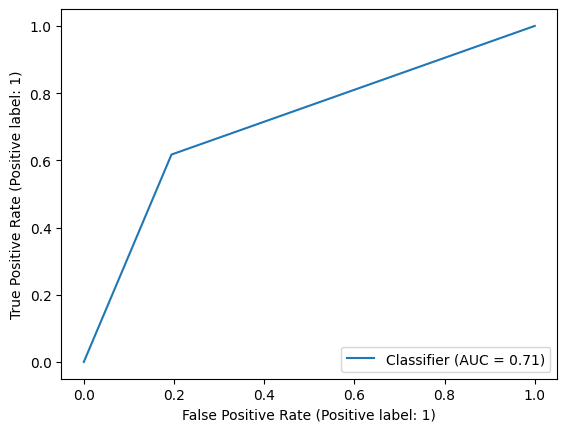

In [322]:
RocCurveDisplay.from_predictions(y,gnbpredict_X)

# Naive_Bayes(GaussianNB) with smote

In [323]:
gnb_sm=GaussianNB()

In [324]:
gnbmodel_sm=gnb_sm.fit(X_smote,y_smote)

In [325]:
gnbmodel_sm.score(X_smote,y_smote)

0.7567631816669044

In [326]:
cross_val_score(gnb_sm,X_smote,y_smote)

array([0.62063228, 0.74170926, 0.79650541, 0.79484132, 0.794247  ])

In [327]:
np.mean([0.62063228, 0.74170926, 0.79650541, 0.79484132, 0.794247  ])

0.7495870539999999

In [328]:
gnbpredict_X_sm=gnb_sm.predict(X_smote)

In [329]:
pd.crosstab(y_smote,gnbpredict_X_sm)

col_0,0,1
row_0,,
0,14775,6258
1,3974,17059


In [330]:
print(classification_report(y_smote,gnbpredict_X_sm))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     21033
           1       0.73      0.81      0.77     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



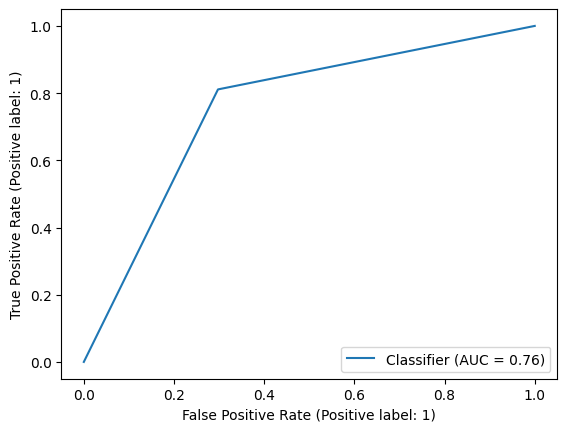

In [331]:
RocCurveDisplay.from_predictions(y_smote,gnbpredict_X_sm)

In [332]:
test_gnb_sm=gnb_sm.predict_proba(vaccinetest_df)

In [333]:
pd.DataFrame(test_gnb_sm).to_csv('gnb_h1n1.csv')

# Naive_Bayes(MultinomialNB)

In [335]:
from sklearn.naive_bayes import MultinomialNB

In [336]:
mnb=MultinomialNB()

In [337]:
mnbmodel=mnb.fit(X,y)

In [338]:
mnbmodel.score(X,y)

0.7641067884824203

In [339]:
cross_val_score(mnb,X,y)

array([0.76694122, 0.75701984, 0.75997004, 0.77045497, 0.76390189])

In [340]:
np.mean([0.76694122, 0.75701984, 0.75997004, 0.77045497, 0.76390189])

0.763657592

In [341]:
mnb_X=mnb.predict(X)

In [342]:
pd.crosstab(y,mnb_X)

col_0,0,1
row_0,,
0,17573,3460
1,2840,2834


In [343]:
print(classification_report(y,mnb_X))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     21033
           1       0.45      0.50      0.47      5674

    accuracy                           0.76     26707
   macro avg       0.66      0.67      0.66     26707
weighted avg       0.77      0.76      0.77     26707



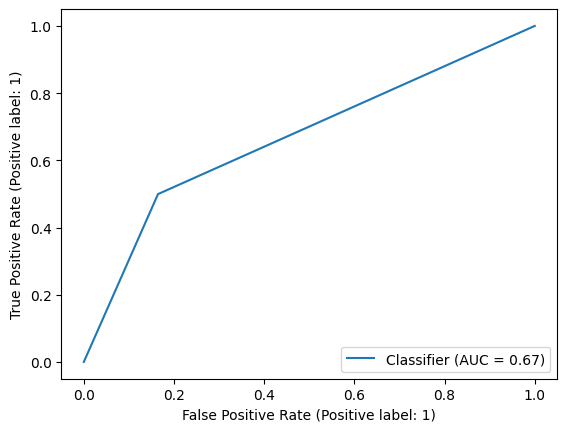

In [345]:
RocCurveDisplay.from_predictions(y,mnb_X)

# Naive_Bayes(MultinomialNB) with smoten

In [346]:
mnb_sm=MultinomialNB()

In [347]:
mnbmodel_sm=mnb_sm.fit(X_smote,y_smote)

In [348]:
mnbmodel_sm.score(X_smote,y_smote)

0.7537203442209861

In [349]:
cross_val_score(mnb_sm,X_smote,y_smote)

array([0.65640599, 0.74658267, 0.77724949, 0.78438131, 0.78010222])

In [350]:
np.mean([0.65640599, 0.74658267, 0.77724949, 0.78438131, 0.78010222])

0.748944336

In [351]:
mnb_sm_predict=mnb_sm.predict(X_smote)

In [353]:
pd.crosstab(y_smote,mnb_sm_predict)

col_0,0,1
row_0,,
0,15977,5056
1,5304,15729


In [354]:
print(classification_report(y_smote,mnb_sm_predict))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76     21033
           1       0.76      0.75      0.75     21033

    accuracy                           0.75     42066
   macro avg       0.75      0.75      0.75     42066
weighted avg       0.75      0.75      0.75     42066



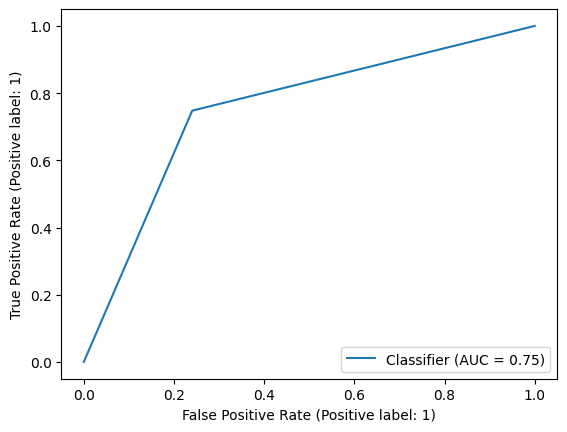

In [357]:
RocCurveDisplay.from_predictions(y_smote,mnb_sm_predict)

In [355]:
test_mnb=mnb_sm.predict_proba(vaccinetest_df)

In [356]:
pd.DataFrame(test_mnb).to_csv('mnb_h1n1.csv')

# Naive_bayes (BernouliNB)

In [358]:
from sklearn.naive_bayes import BernoulliNB

In [359]:
ber=BernoulliNB()

In [360]:
bermodel=ber.fit(X,y)

In [361]:
bermodel.score(X,y)

0.7953719998502266

In [362]:
cross_val_score(ber,X,y)

array([0.79183826, 0.79202546, 0.80116083, 0.80228422, 0.78786744])

In [363]:
np.mean([0.79183826, 0.79202546, 0.80116083, 0.80228422, 0.78786744])

0.7950352420000001

In [364]:
berpredict_X=ber.predict(X)

In [365]:
pd.crosstab(y,berpredict_X)

col_0,0,1
row_0,,
0,18583,2450
1,3015,2659


In [366]:
print(classification_report(y,berpredict_X))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     21033
           1       0.52      0.47      0.49      5674

    accuracy                           0.80     26707
   macro avg       0.69      0.68      0.68     26707
weighted avg       0.79      0.80      0.79     26707



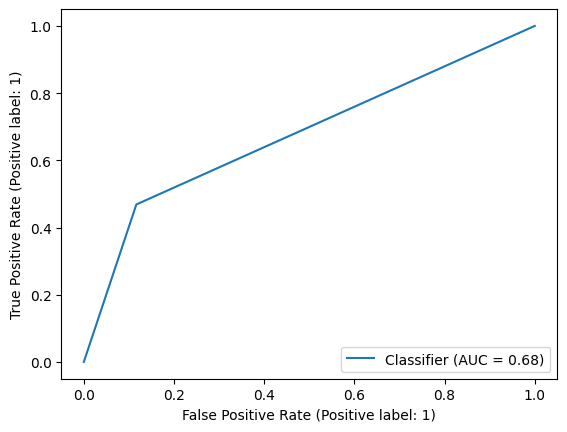

In [368]:
RocCurveDisplay.from_predictions(y,berpredict_X)

# Naive_bayes (BernouliNb) with Smoten

In [369]:
ber_sm=BernoulliNB()

In [370]:
bermodel_sm=ber_sm.fit(X_smote,y_smote)

In [371]:
bermodel_sm.score(X_smote,y_smote)

0.7633956164123045

In [372]:
cross_val_score(ber_sm,X_smote,y_smote)

array([0.64392679, 0.74408653, 0.80007132, 0.79828836, 0.79246404])

In [373]:
np.mean([0.64392679, 0.74408653, 0.80007132, 0.79828836, 0.79246404])

0.755767408

In [374]:
berpredict_X_sm=ber_sm.predict(X_smote)

In [375]:
pd.crosstab(y_smote,berpredict_X_sm)

col_0,0,1
row_0,,
0,15671,5362
1,4591,16442


In [376]:
print(classification_report(y_smote,berpredict_X_sm))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     21033
           1       0.75      0.78      0.77     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



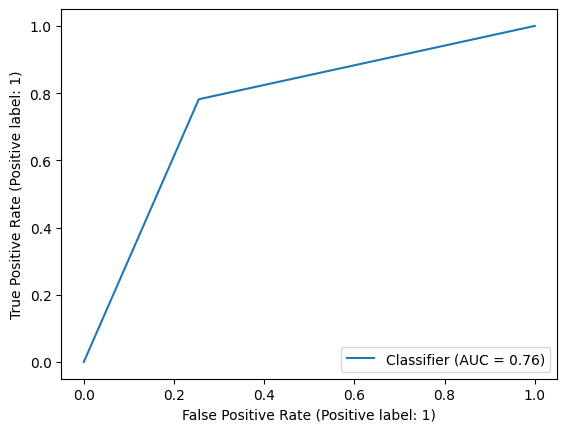

In [377]:
RocCurveDisplay.from_predictions(y_smote,berpredict_X_sm)

In [378]:
test_ber=ber_sm.predict_proba(vaccinetest_df)

In [379]:
pd.DataFrame(test_ber).to_csv('ber_h1n1.csv')

# Summary
The Flu h1n1_vaccine dataset was analyzed using various machine learning models, and the results are summarized below. The table shows the performance of each model on five different metrics: ML model score, accuracy score, smote accuracy score, ROC/AUC curve value and cross validation score.

| Model | Accuracy Score without smoten | Accuracy Score with smoten | ROC/AUC Score | ROC/AUC Score with smoten |
|--|--|--|--|--|
| Logistic regression | 0.8305313213764182 | 0.8109874958398707 | 0.67 | 0.81 |
| Decision Tree | 0.899127569551054 | 0.8120334712119051 | 0.81 | 0.81 |
| Random Forest | 0.8427753023551878 | 0.8107973184995008 | 0.67 | 0.81 |
| Gradient Boosting Machine | 0.8602987980679223 | 0.8187847667950364 | 0.73 | 0.82 |
| Support Vector Machine | 0.8315797356498297 | 0.8231588456235439 | 0.65 | 0.82 |
| K-Nearest Neighbors | 0.8468940727150185 | 0.8512813198307422 | 0.69 | 0.85 |
| Gaussian (Naive Bayes) | 0.7655670797918149 | 0.7567631816669044 |0.71 | 0.76 |
| Multinomial (Naive Bayes) | 0.7641067884824203 | 0.7537203442209861 | 0.67 | 0.75 |
| Bernoulli (Naive Bayes) | 0.7953719998502266 | 0.7633956164123045 | 0.68 | 0.76 |

The best model for the FLU h1n1_vaccine dataset is the gradient boosting machine, which has the highest scores on all the metrics, especially the ML model score and the ROC/AUC curve value, which measure how well the model can fit the data and how well it can separate the classes.

The K-Nearest Neighbors outperforms the other models by a large margin, as shown by the comparison with the logistic regression model, which has a similar ROC/AUC curve value of 0.85, but a much lower ML model score of 0.85 and a lower accuracy score of 0.83, which indicate that it is not as accurate or reliable as the gradient boosting machine.

The ROC/AUC curve value is a metric that evaluates how well a model can distinguish between different classes of data, such as employees who left or stayed in the company in the FLU h1n1_vaccine dataset. ROC stands for receiver operating characteristic, and it plots the true positive rate (TPR) against the false positive rate (FPR) for different thresholds of classification. AUC stands for area under the curve, and it measures the area under the ROC curve, which ranges from 0 to 1. A higher AUC value means that the model can better separate the classes, while a lower AUC value means that the model is more likely to confuse the classes.

Therefore, we can conclude that the gradient boosting machine is the best model for the FLU h1n1_vaccine dataset, as it has the highest ML model score, accuracy score and ROC/AUC curve value among all the models, and it can predict the outcomes of the data with high confidence and precision.